# Project: Investigating the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be exploring and investigating the TMDb Movie dataset that includes more than 10,000 movies from the years 1960 to 2018. The project comprises of three questions with each analysing a different variable in the dataset by how other variables relate to it. These questions are as follows: 
>1.  Are high budget films more popular than low budget films?
>2. How have movie budgets and revenues changed over time?
>3. Among movies by the top 5 directors, how is movie revenue related to budget and popularity?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading data and checking for missing entries
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
#Checking for duplicate entries in the data. 
#I used the IMDB ID column to check for duplicates as each movie should have a unique ID.
sum(df.duplicated(subset = ['imdb_id']))

10

## Issues
>The data contains missing entries along several columns in 9 of the 21 columns. However, this study will only be using 3 of the 9 columns (Cast & Director) so I will clean the data only for the missing data in these columns.  

>The data contains 10 duplicated values.

>The Release Date column is stored in the wrong data type.

>Further down in the analysis, I realized there were non-null values of the Adjusted Budget and Adjusted Revenue columns that were 0s. We would also have to remove these.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
#Removing missing entries from the data set
#Since some of the columns with missing entries contain categorical data, we will drop the rows with missing entries.
df.dropna(subset = ['cast', 'director', 'imdb_id'], inplace = True)

#Removing duplicated values using the 'imdb_id' column.
df.drop_duplicates(subset = ['imdb_id'], inplace = True)

In [5]:
#Use the drop() function to remove 0 values from the budget_adj and revenue_adj values.
df.drop(df[df['budget_adj'] == 0].index, inplace=True)
df.drop(df[df['revenue_adj'] == 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3849 non-null   int64  
 1   imdb_id               3849 non-null   object 
 2   popularity            3849 non-null   float64
 3   budget                3849 non-null   int64  
 4   revenue               3849 non-null   int64  
 5   original_title        3849 non-null   object 
 6   cast                  3849 non-null   object 
 7   homepage              1424 non-null   object 
 8   director              3849 non-null   object 
 9   tagline               3572 non-null   object 
 10  keywords              3713 non-null   object 
 11  overview              3849 non-null   object 
 12  runtime               3849 non-null   int64  
 13  genres                3849 non-null   object 
 14  production_companies  3805 non-null   object 
 15  release_date        

We have cleaned the data for missing values and duplicated values.  
We will not change the 'release_date' datatype as this will not be used in the study.
>The dataset now has **3,849** entries that we will use.

<a id='eda'></a>
## Exploratory Data Analysis



### Q1 - Are high budget films more popular than low budget films?
>In this study, I will create a categorical column that defines entries as either high budget or low budget based on the inflation-adjusted budget values. I will then explore whether high budget films tend to be more popular than low budget films.

In [6]:
#Create a new column 'budget_category' by splitting the dataframe into high and low budget categories using the cut function.
#I first specified the limits for the bin edges as well as name the bins.
bin_edges = [9.210911e-01, 3.699583e+07	, 4.250000e+08]
bin_names = ['Low Budget', 'High Budget']
df['budget_category'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_names)

In [7]:
#Confirm new column has been created.
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_category
10779,9584,tt0077369,0.411826,12000000,22765081,Convoy,Kris Kristofferson|Ali MacGraw|Ernest Borgnine...,NaN,Sam Peckinpah,Kristofferson and MacGraw...ain't nothin' gonn...,...,110,Action|Comedy|Drama,EMI Films Ltd.,6/27/78,31,6.2,1978,4.011241e+07,7.609685e+07,High Budget
10780,11850,tt0077745,0.409377,3500000,24046533,Invasion of the Body Snatchers,Donald Sutherland|Brooke Adams|Leonard Nimoy|V...,NaN,Philip Kaufman,From deep space... The seed is planted... the ...,...,115,Horror|Thriller|Science Fiction|Mystery,United Artists|Solofilm,12/19/78,87,6.5,1978,1.169945e+07,8.038036e+07,Low Budget
10788,24961,tt0078504,0.277769,24000000,21049053,The Wiz,Diana Ross|Michael Jackson|Nipsey Russell|Ted ...,NaN,Sidney Lumet,From the book that's an American traditionâ€¦ ...,...,134,Adventure|Family|Fantasy|Music|Science Fiction,Universal Pictures|Motown Productions,10/24/78,30,6.1,1978,8.022482e+07,7.036068e+07,High Budget
10791,10766,tt0077394,0.236193,6800000,26518355,Damien: Omen II,William Holden|Lee Grant|Jonathan Scott-Taylor...,NaN,Don Taylor|Mike Hodges,The first time was only a warning.,...,107,Action|Drama|Horror|Thriller,Twentieth Century Fox Film Corporation|Mace Ne...,6/9/78,71,6.1,1978,2.273036e+07,8.864292e+07,Low Budget
10793,11837,tt0078480,0.226002,1000000,3713768,Watership Down,John Hurt|Richard Briers|Michael Graham Cox|Jo...,NaN,Martin Rosen,"All the world will be your enemy, Prince with ...",...,88,Adventure|Animation|Drama,Nepenthe Productions|Watership Productions,10/14/78,67,6.8,1978,3.342701e+06,1.241401e+07,Low Budget
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,High Budget
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,Low Budget
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,Low Budget
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,High Budget
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,Low Budget


In [8]:
#Compare descriptive statistics of the popularity of the two categories created 
#by using the groupby function coupled with the describe function.
df.groupby('budget_category', as_index=False)['popularity'].describe()

budget_category  0     Low Budget
                 1    High Budget
count            0         2256.0
                 1         1593.0
mean             0       0.865176
                 1       1.657102
std              0       0.866368
                 1       1.957577
min              0       0.001117
                 1       0.017498
25%              0        0.37577
                 1       0.676667
50%              0       0.624224
                 1       1.119731
75%              0       1.052936
                 1       1.911206
max              0      11.422751
                 1      32.985763
dtype: object

In [9]:
#Create new dataframe by using groupby to group by budget categories to find the mean of each category's popularity.
#I will use this to plot a visualization
df_popular = df.groupby('budget_category', as_index=False)['popularity'].mean()
df_popular

,budget_category,popularity
0,Low Budget,0.865176
1,High Budget,1.657102


In [10]:
#I used matplotlib to plot a bar chart of popularity by budget category
#First, I stored the mean values in a list.
low_mean = df_popular['popularity'][0]
high_mean = df_popular['popularity'][1]
heights = [low_mean, high_mean]

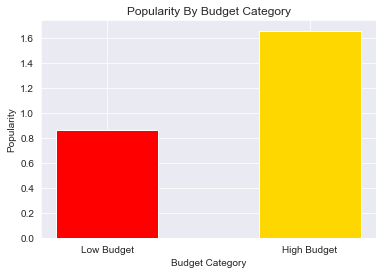

<Figure size 720x360 with 0 Axes>

In [11]:
# I then stored other variables before proceeding to visualize.
points = [1,2]
colors = ['Red', 'Gold']


# I used a function to plot the chart as below.

def plot(x_label, y_label, title, x_tick_labels):
    plt.bar(points, heights, color=colors, width=0.5)
    plt.xticks([1,2], labels = x_tick_labels)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.figure(figsize = [10, 5])
    plt.draw()
    return plt.show()
plot('Budget Category', 'Popularity', 'Popularity By Budget Category', ['Low Budget', 'High Budget'])

The analysis indicates that high budget movies have a high popularity score than low budget movies with means of **1.65** and **0.87** respectively.  

The most popular low budget movie scored **11.42** while the most popular high budget movie scored **32.99**.

### Q2 - How have movie budgets and revenues changed over time?
>This is a longitudinal study that will explore how movie budgets and revenues have changed over the whole dataset's timeframe using the movies' release year as the independent variable.  
>We will then plot the findings in an area chart.

In [12]:
#I started by grouping movies' inflation-adjusted revenue and budget values by their release year.
#Store this in different dataframe
variables = ['revenue_adj', 'budget_adj']
df_years = df.groupby(['release_year'], as_index=False)[variables].sum()

#Preview to confirm
df_years.head()

,release_year,revenue_adj,budget_adj
0,1960,9.511497e+08,1.534090e+08
1,1961,2.463622e+09,2.818516e+08
2,1962,1.487318e+09,2.843733e+08
3,1963,1.256903e+09,4.351498e+08
4,1964,2.310241e+09,2.385733e+08


<AxesSubplot:title={'center':'Budgets and Revenues from 1960 to 2018'}, xlabel='Release Year', ylabel='Inflation Adjusted Amounts'>

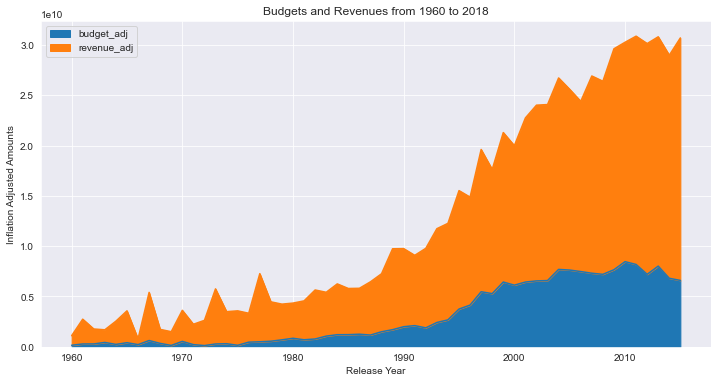

In [13]:
#I then used this dataframe to create an area chart showing how the 2 variable have changed from 1960 to 2018.
df_years.plot(kind='area', figsize=(12,6), x='release_year', y=['budget_adj','revenue_adj'],
              title='Budgets and Revenues from 1960 to 2018', xlabel='Release Year', ylabel='Inflation Adjusted Amounts')

Both values increase over time. However, there is a slump in inflation adjusted budget values toward the end of the time period of the study.  
Revenues increased at a higher rate over time than budgets.

### Q3 - Among movies by the top 5 directors, how is movie revenue related to budget and popularity?
>This study will seek to find the top 5 directors by movie revenue (inflation-adjusted) and then find out how movie revenue for this subset is related to movie budget and popularity.  
>We will then plot the findings in a bubble chart.

In [14]:
#Find the top 5 directors
#For this, I grouped the inflation-adjusted revenues by director and found the sum of the directors' total revenues.
#After this, I used the nlargest function to find the top 5 directors by these revenue totals.
#I stored these in a new dataframe

df_revenues = df.groupby(['director'], as_index=False)['revenue_adj'].sum()
df_revenues = df_revenues.nlargest(5, 'revenue_adj')
df_revenues


,director,revenue_adj
1545,Steven Spielberg,1.520245e+10
640,James Cameron,7.327221e+09
1239,Peter Jackson,7.019848e+09
539,George Lucas,6.313919e+09
1374,Robert Zemeckis,5.655648e+09


In [15]:
#From the original dataset, create a subset including only movie entries by the top 5 directors.
#I created a list of these top 5 directors and used this to create a new df only including entries of the top directors.
variables = list(df_revenues['director'])
df_subset = df.loc[df['director'].isin(variables)]
df_subset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_category
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08,Low Budget
83,285783,tt3488710,2.049886,35000000,61181942,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,http://www.sonypictures.com/movies/thewalk/,Robert Zemeckis,Dream High.,...,123,Adventure|Drama|Thriller,TriStar Pictures|Sony Pictures Entertainment|I...,9/30/15,706,6.8,2015,3.219999e+07,5.628736e+07,Low Budget
634,122917,tt2310332,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,http://www.thehobbit.com/,Peter Jackson,Witness the defining chapter of the Middle-Ear...,...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/14,3110,7.1,2014,2.302728e+08,8.797523e+08,High Budget
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,High Budget
1334,840,tt0075860,1.104816,20000000,303788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,NaN,Steven Spielberg,We are not alone.,...,135,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,11/16/77,600,7.0,1977,7.195562e+07,1.092965e+09,High Budget


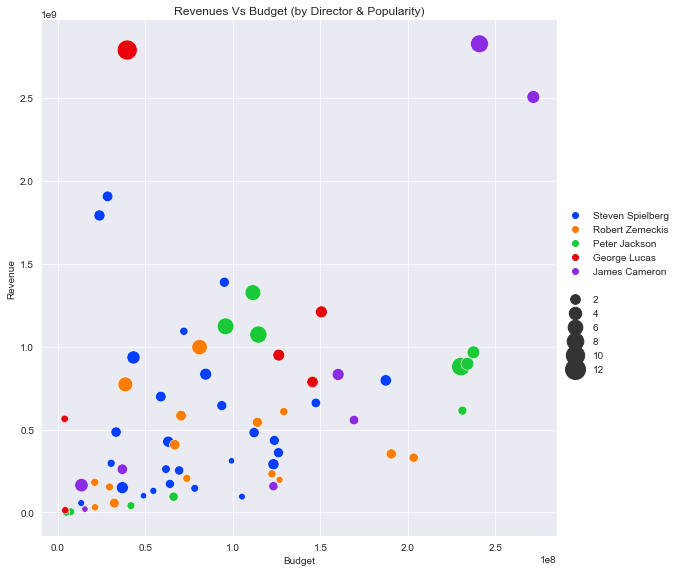

In [16]:
#I plotted a bubblechart using this new dataframe.
#I used seaborn to create the chart 
#Revenues (y) have been plotted against the budgets (x), with bubble size representing popularity.
#Different hues were also used to differentiate the directors

#Customize colors
colors = ['Blue', 'Purple', 'DarkRed', 'Grey', 'Gold']
#Plot chart
chart4=sns.relplot(data=df_subset, x='budget_adj', y='revenue_adj', hue='director', palette='bright', size='popularity', sizes=(40,400), height=8, aspect=1)
plt.title('Revenues Vs Budget (by Director & Popularity)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
#Remove legend titles
chart4._legend.texts[0].set_text('')
chart4._legend.texts[6].set_text('')

Generally, revenues seem to increase with increase in budget, showing a positive correlation.  
*Peter Jackson* has the highest number of most popular movies while *Robert Zemeckis* has few high revenue movies.

<a id='conclusions'></a>
## Conclusions

> **Q1**: High budget movies were observed to have higher popularity, with the mean popularity of high budget movies (1.657102) being higher than that of low budget movies (0.865176). In addition to this, all the observed descriptive stats of high budget movies were higher than those of low budget movies. 
This shows a positive correlation between budget and popularity but does not imply causation of any kind.  

> **Q2**: Movie revenues and budgets (adjusted for inflation) have increased significantly over the time period of the study. Movie budgets increased steadily over time but saw a slump in the last decade. Movie revenues have increased at a higher rate than budgets, increasing margins between revenues and margins in recent years. 
This shows a correlation between budgets & revenues and time period but does not imply causation of any kind.  

> **Q3**: There is a positive correlation between budget and revenues (both inflation-adjusted) of the top directors by revenue. Although there are a number of outliers, there is also a positive correlation between movie popularity and movie revenues.
These results, again, do not show any causation between the two independent variables (budget and popularity) and revenues.

## Limitations
>A large proportion of the dataset we used could not be used for our studies. While the dataset had 10,866 entries, we could only use 3,849 for our study after cleaning the data. This could significantly affect the outcome of the data analysis. 

>In **Q2**, we saw a slump in movie budgets in the most recent decade. It would be good to know why this was the case as this time period does not have a positive correlation with the movie budgets. This study could not explain this anomaly.



### References
>https://pandas.pydata.org/docs/reference/frame.html  
>https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/#:~:text=Use%20drop()%20method%20to,or%20on%20another%20column%20value  
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html  
>https://seaborn.pydata.org/generated/seaborn.relplot.html  
>https://sharkcoder.com/data-visualization/seaborn-scatterplot